### load the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
Full = pd.concat([train,test])

In [6]:
Full.shape

(10876, 5)

### remove urls

In [10]:
import re

In [7]:
ex = 'New competition launched :https://www.kaggle.com/c/nlp-getting-started'

In [8]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

In [11]:
remove_url(ex)

'New competition launched :'

In [12]:
Full['text'] = Full['text'].apply(remove_url)

### remove HTML tags

In [46]:
ex = """<div><h1>Real or Fake </h1> <p>Kaggle </p><a href= 'https://www.kaggle.com/c/nlp-getting-started'>getting started</a></dic>"""

In [47]:
def remove_HTML(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

In [48]:
remove_HTML(ex)

'Real or Fake  Kaggle  getting started'

In [49]:
Full['text'] = Full['text'].apply(remove_HTML)

### remove emojis

In [50]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [51]:
remove_emoji("Omg another Earthquake 😔😔")

'Omg another Earthquake '

In [52]:
Full['text']=Full['text'].apply(remove_emoji)

### remove punctuation

In [56]:
import string

In [53]:
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

In [58]:
ex = '#do you know who am i'

In [59]:
remove_punct(ex)

'do you know who am i'

In [60]:
Full['text'] = Full['text'].apply(remove_punct)

### wordcloud

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [65]:
def create_corpus(data, target):
    corpus = []
    for i in data[data['target']==target]['text'].apply(lambda x: x.split()):
        for x in i:
            corpus.append(x)
    return corpus

In [66]:
disaster_tweet = create_corpus(Full, 1)

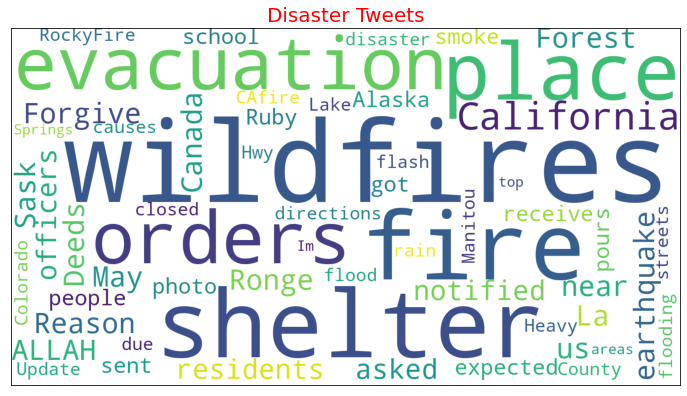

In [102]:
wordcloud = WordCloud(background_color ='white', height=800, width=1500, max_words=200).generate(' '.join(disaster_tweet[:100]))
plt.imshow(wordcloud)
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.xticks([])
plt.yticks([])
plt.title('Disaster Tweets', size=20, color='r');

In [98]:
non_disaster_tweet = create_corpus(Full, 0)

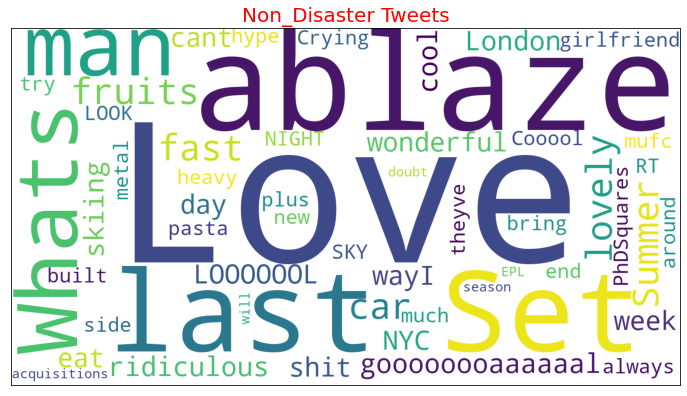

In [105]:
wordcloud = WordCloud(background_color ='white', height=800, width=1500, max_words=200).generate(' '.join(non_disaster_tweet[:100]))
plt.imshow(wordcloud)
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.xticks([])
plt.yticks([])
plt.title('Non_Disaster Tweets', size=20, color='r');